In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [5]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv.zip')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv.zip')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(42000, 785)

In [8]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [9]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [10]:
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

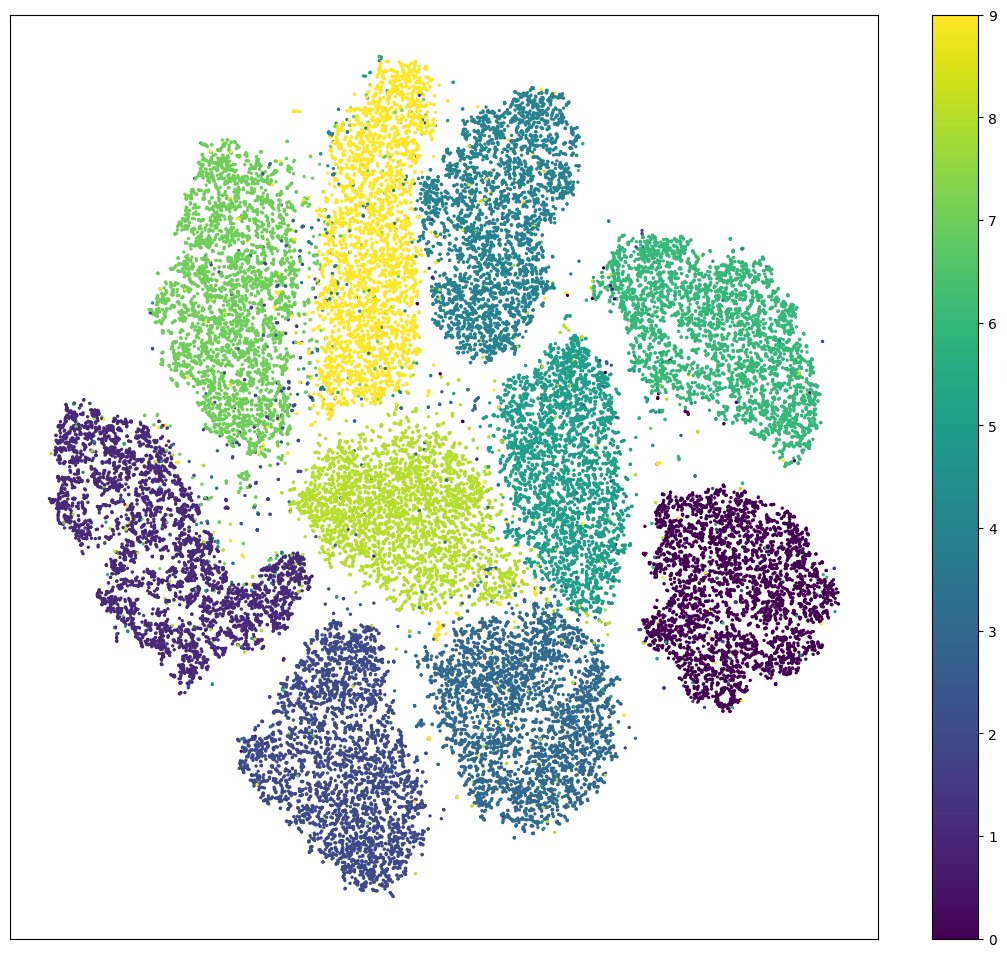

In [11]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [13]:


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)



X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [14]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [15]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [16]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [17]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


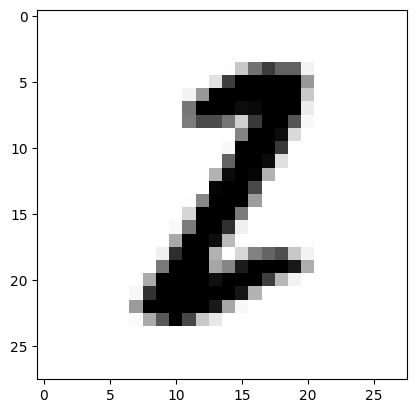

In [18]:


plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()



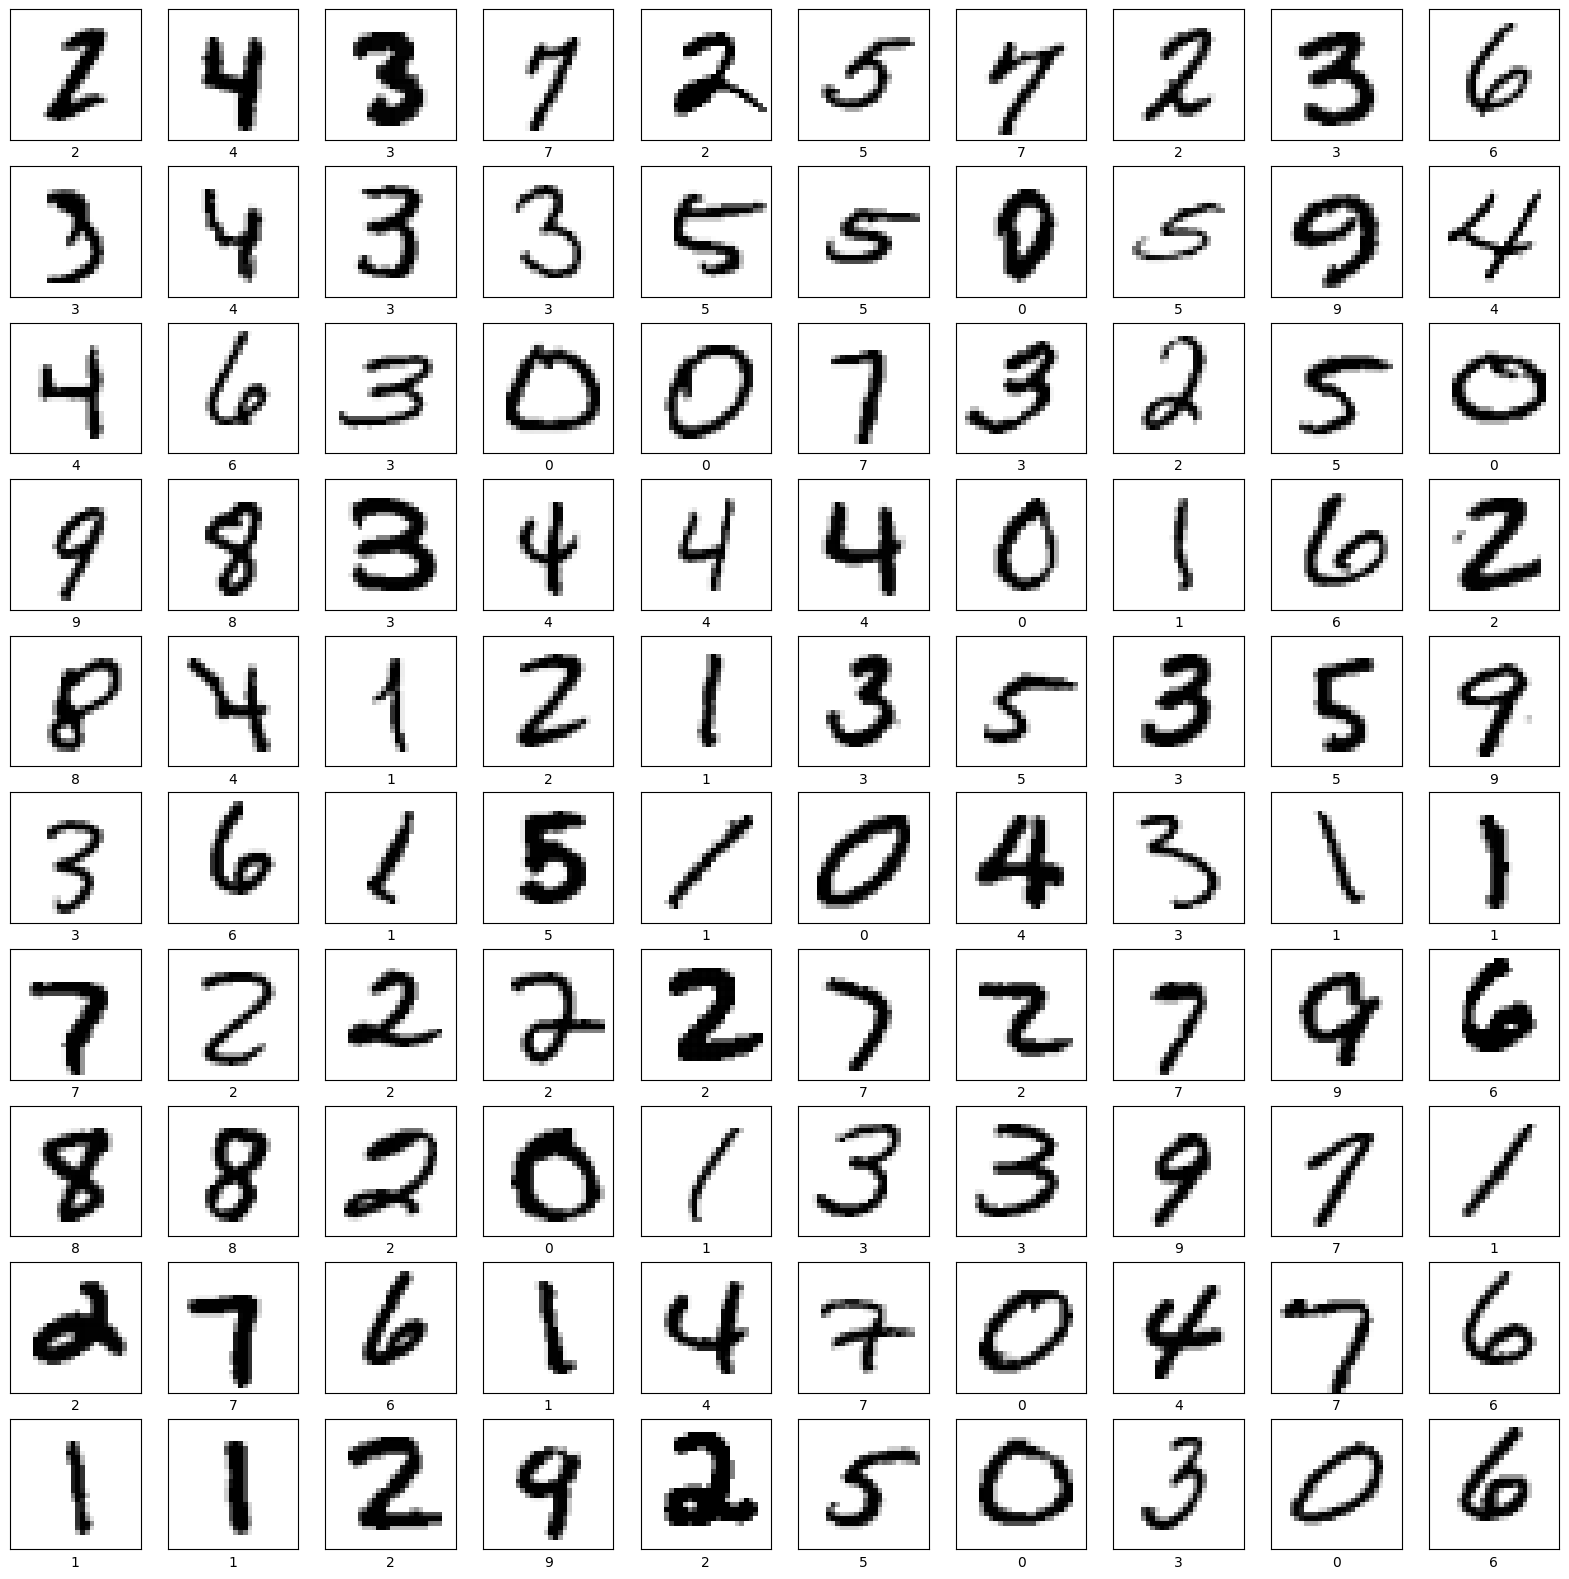

In [19]:


numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()



In [20]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [21]:


print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)



x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [22]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [23]:


# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]



array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

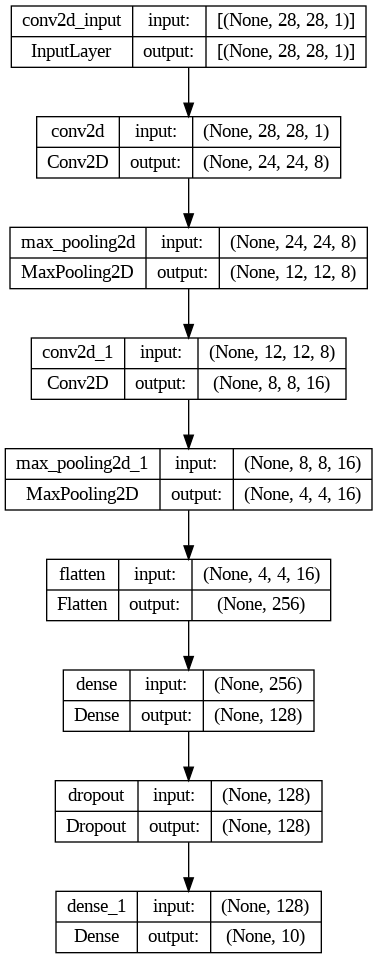

In [26]:


tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)



In [27]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [30]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")


Epoch 1/10
1050/1050 [==============================] - 21s 18ms/step - loss: 0.2752 - accuracy: 0.9148 - val_loss: 0.0906 - val_accuracy: 0.9721
Epoch 2/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0831 - accuracy: 0.9741 - val_loss: 0.0552 - val_accuracy: 0.9839
Epoch 3/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0613 - accuracy: 0.9806 - val_loss: 0.0558 - val_accuracy: 0.9835
Epoch 4/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 5/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0455 - val_accuracy: 0.9856
Epoch 6/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0326 - accuracy: 0.9889 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 7/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0422 -

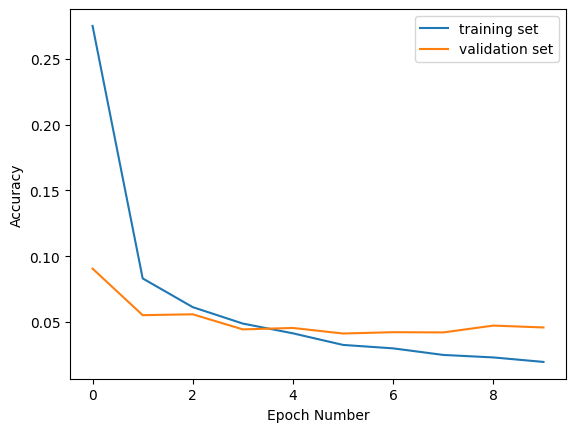

In [31]:


plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()



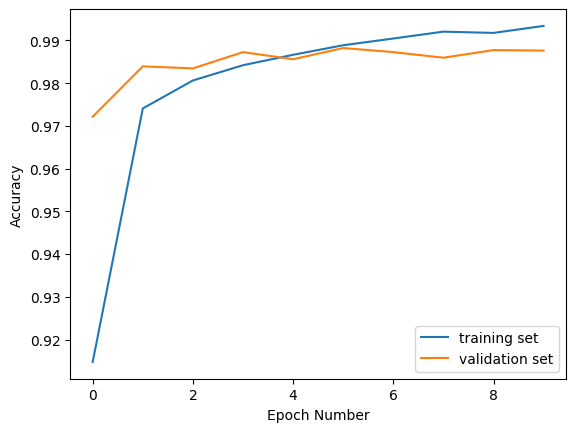

In [32]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()


In [33]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

1050/1050 [==============================] - 7s 7ms/step - loss: 0.0106 - accuracy: 0.9967


In [34]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.010622809641063213
Train accuracy:  0.996666669845581


In [35]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

263/263 [==============================] - 2s 8ms/step - loss: 0.0458 - accuracy: 0.9876


In [38]:


print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)



Validation loss:  0.04583175107836723
Validation accuracy:  0.9876190423965454


In [39]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
loaded_model = tf.keras.models.load_model(model_name)

In [41]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 3s 10ms/step


In [42]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [43]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,9.112453e-12,9.999999e-01,9.070879e-10,4.132396e-15,1.705848e-09,2.326604e-15,6.790998e-11,1.093512e-10,9.849446e-10,7.267885e-11
1,1.005890e-10,5.165022e-09,1.313919e-10,9.999920e-01,9.221623e-12,1.248224e-06,7.892202e-12,2.863870e-10,3.284115e-07,6.301918e-06
2,2.789305e-12,2.218836e-13,2.537778e-09,7.643507e-09,5.014490e-14,8.983434e-09,4.207829e-11,8.003342e-14,9.999999e-01,8.372610e-11
3,4.540391e-12,9.999997e-01,1.224337e-09,6.571444e-12,7.999169e-08,1.764377e-12,1.824715e-10,7.514939e-08,1.582264e-10,1.626779e-09
4,8.317426e-13,4.616178e-14,9.755058e-10,1.292156e-08,2.253092e-05,1.367023e-09,7.228275e-17,2.812447e-07,2.969927e-05,9.999474e-01
...,...,...,...,...,...,...,...,...,...,...
8395,1.579916e-20,1.453681e-13,5.889951e-13,1.239450e-16,9.999999e-01,9.435868e-15,1.099614e-15,7.442610e-14,4.547754e-14,3.881574e-12
8396,1.380104e-09,5.764506e-14,4.589146e-14,8.441703e-09,1.508513e-14,9.998231e-01,2.783873e-06,4.985142e-17,1.742356e-04,9.276695e-11
8397,3.008075e-16,3.904777e-09,2.705291e-13,5.631461e-14,2.134179e-06,2.596685e-13,3.458598e-19,9.999978e-01,2.412702e-13,1.278099e-08
8398,1.283870e-12,1.333555e-17,2.489580e-13,2.637978e-15,6.203578e-12,3.200571e-13,9.999999e-01,5.934846e-24,1.206143e-14,8.927934e-17


In [44]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


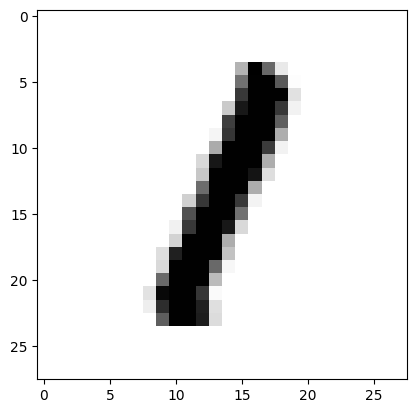

In [45]:


plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()



<ipython-input-46-f15184e95b81>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


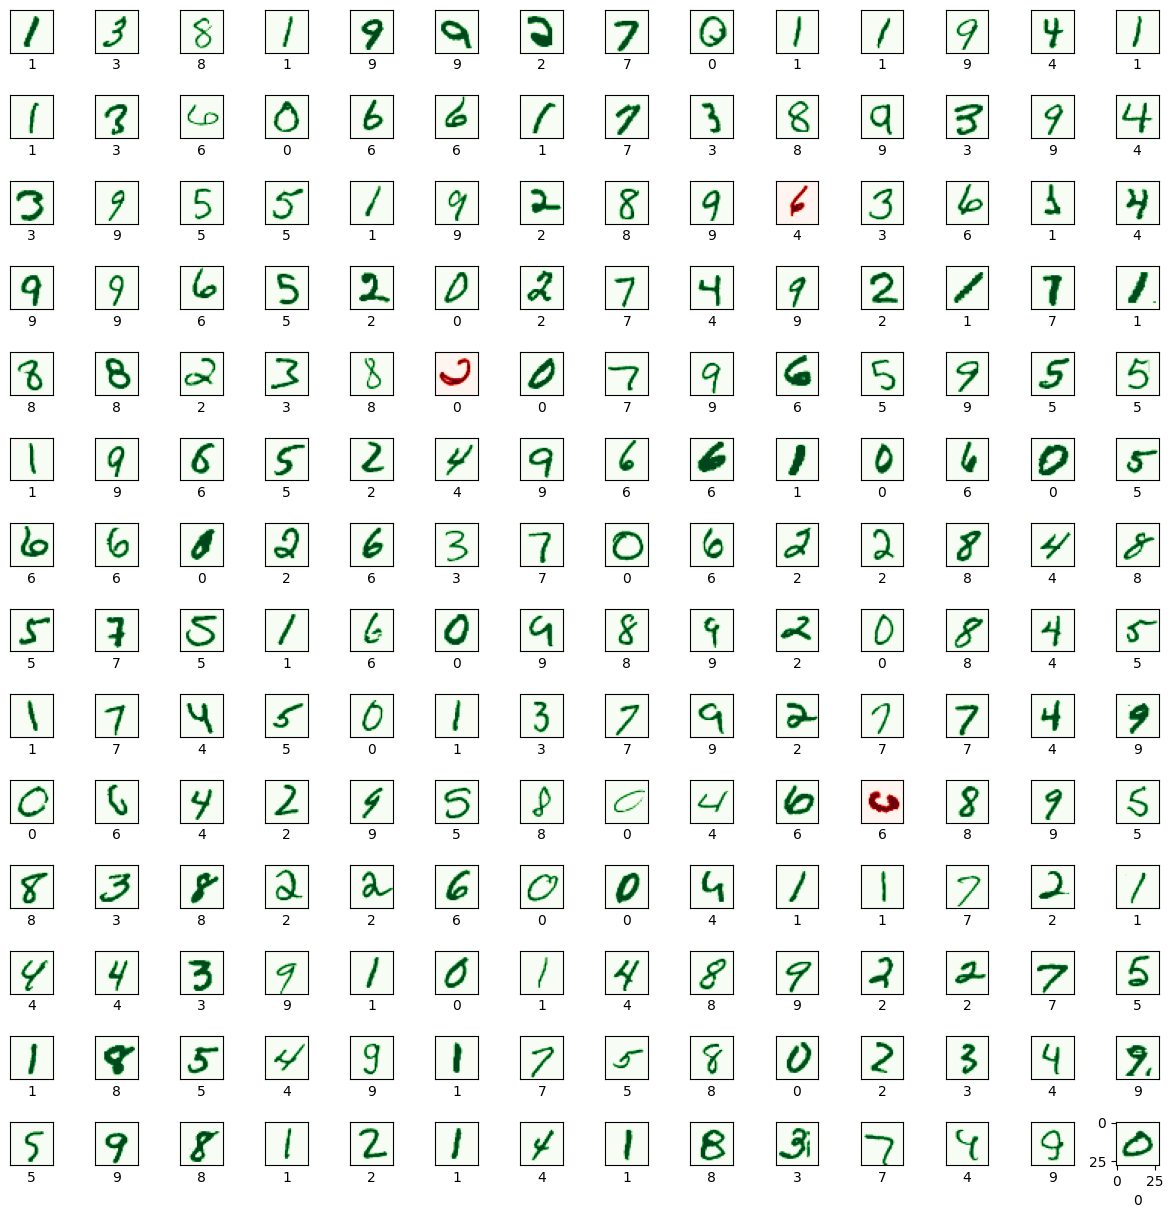

In [46]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

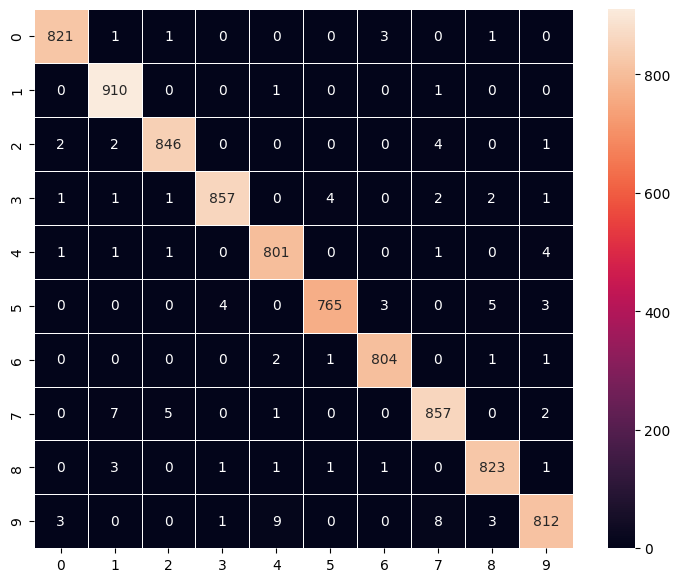

In [47]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [48]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 7s 7ms/step
predictions_one_hot: (28000, 10)


In [49]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.379400e-10,9.505962e-14,9.999999e-01,4.649510e-12,8.303085e-14,2.088840e-18,5.515345e-16,3.110983e-12,1.927793e-11,4.444588e-16
1,9.999993e-01,7.264820e-14,4.996926e-08,3.826516e-11,3.683489e-12,1.567686e-09,5.066319e-07,6.267986e-10,1.536552e-09,1.462709e-08
2,4.432822e-11,4.337834e-10,2.681706e-07,6.551880e-07,1.203203e-05,6.176281e-08,2.024579e-12,2.887616e-09,9.787724e-05,9.998891e-01
3,6.386172e-01,2.709577e-10,8.515444e-05,1.591537e-05,7.725716e-06,3.211179e-06,6.673962e-05,1.608963e-07,4.727547e-06,3.611992e-01
4,4.244352e-09,4.541180e-10,3.379360e-08,9.999931e-01,7.562882e-13,2.821493e-08,6.377477e-11,1.863729e-10,6.791993e-06,3.286477e-08
...,...,...,...,...,...,...,...,...,...,...
27995,1.156028e-12,8.179020e-17,1.675869e-11,6.225025e-09,2.794542e-06,8.543458e-11,7.315219e-19,1.471508e-06,9.208247e-08,9.999955e-01
27996,1.459139e-11,2.825926e-08,3.829727e-07,1.022401e-09,4.197537e-07,7.883427e-12,4.672673e-16,9.999990e-01,6.396870e-12,6.832187e-08
27997,1.379481e-17,2.372102e-16,1.483652e-18,9.999999e-01,2.205870e-23,9.279953e-13,1.264427e-23,5.714607e-17,4.915436e-15,2.056179e-12
27998,7.870709e-12,6.746705e-11,5.371962e-10,2.110198e-09,5.087831e-05,1.051498e-09,2.479442e-15,2.424852e-07,1.582390e-07,9.999487e-01


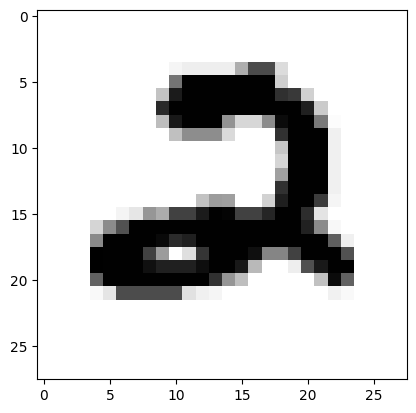

In [50]:


plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()



In [51]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 6s 7ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [52]:
test_pred.to_csv('submission.csv', index = False)